In [7]:
# UČITAVANJE REZULTATA
# Prilagodi imena CSV-ova!
import pandas as pd

df1 = pd.read_csv("optimizirano_2707/smoke_test/1_prompt_test_results.csv")
df2 = pd.read_csv("optimizirano_2707/smoke_test/2_chat_test_results.csv")
df3 = pd.read_csv("optimizirano_2707/smoke_test/3_summarize_test_results.csv")
df4 = pd.read_csv("optimizirano_2707/smoke_test/4_batch_test_results.csv")

user_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

dfa = pd.read_csv("optimizirano_2707/locust/1_prompt_test_results.csv")
dfb = pd.read_csv("optimizirano_2707/locust/2_chat_test_results.csv")
dfc = pd.read_csv("optimizirano_2707/locust/3_summarize_test_results.csv")
dfd = pd.read_csv("optimizirano_2707/locust/4_batch_test_results.csv")


locust_df = pd.concat([dfa, dfb, dfc, dfd], ignore_index=True)   # Pretpostavi ime datoteke

user_df['test_type'] = 'client'
locust_df['test_type'] = 'stress'

# join user_df and locust_df
df = pd.concat([user_df, locust_df], ignore_index=True)



df.head(1)
#df.groupby(['model', 'test_type', 'test_name']).size()

,timestamp,test_name,prompt_index,model,prompt,ttft,tpot,tokens_per_sec,latency,prompt_tokens,output_tokens,output_text,status_code,test_type
0,2025-07-27 11:32:56.163833,single,0,gemma3,Which disease is more common among adults - di...,55.602557,0.448591,2.229203,55.625264,12.0,124,Which disease is more common among adults - di...,200,client


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prikaz osnovne tablice željenih metrika
important_cols = ['model', 'test_name', 'test_type', 'ttft', 'tpot', 'tokens_per_sec', 'latency']

# Create the summary DataFrame globally
summary = df.groupby(['model', 'test_name', 'test_type']).agg({
    'ttft': 'mean',
    'tpot': 'mean',
    'tokens_per_sec': 'mean',
    'latency': 'mean'
}).reset_index()
def summary_statistics(df, model, test_type):
    # Filter by model if provided
    if model is not None:
        df = df[df['model'] == model]
    if test_type is not None:
        df = df[df['test_type'] == test_type]
    # Group and aggregate
    summary = df.groupby(['model', 'test_name', 'test_type']).agg({
        'ttft': 'mean',
        'tpot': 'mean',
        'tokens_per_sec': 'mean',
        'latency': 'mean'
    }).reset_index()
    display(summary)

models = df.model.unique()
test_types = df.test_type.unique()

for model in models:
    for ttype in test_types:
        summary_statistics(df, model, ttype)

stress_summary = summary[summary['test_type'] == 'stress']



,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,gemma3,batch,client,32.979822,0.275917,31.947949,32.986820
1,gemma3,chat,client,12.821413,0.030116,97.093191,12.829133
2,gemma3,single,client,2.783373,0.021125,73.994999,2.791886
3,gemma3,summarizer,client,36.920639,0.003018,331.385987,36.929745


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,mistral,batch,client,3.198348,0.024785,41.907760,3.206256
1,mistral,chat,client,2.623166,0.009819,140.746830,2.631038
2,mistral,single,client,2.517708,0.018405,55.185370,2.526259
3,mistral,summarizer,client,3.413041,0.000241,4143.679856,3.418942


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,mistral,batch,stress,30.208429,0.249207,4.698460,30.219084
1,mistral,chat,stress,199.242897,0.229825,8.118969,199.298626
2,mistral,single,stress,66.982331,0.517803,2.548666,67.000131
3,mistral,summarizer,stress,76.316354,0.005448,219.159191,76.338163


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,meta-llama,batch,client,3.373580,0.023415,42.931308,3.380215
1,meta-llama,chat,client,2.790512,0.010426,133.696066,2.797598
2,meta-llama,single,client,2.771576,0.019419,51.841055,2.780253
3,meta-llama,summarizer,client,3.280802,0.000276,3625.445935,3.285389


,model,test_name,test_type,ttft,tpot,tokens_per_sec,latency
0,meta-llama,batch,stress,24.084497,0.172753,6.186261,24.094519
1,meta-llama,chat,stress,172.463692,0.187088,10.147555,172.516703
2,meta-llama,single,stress,66.969528,0.466080,2.963896,66.985124
3,meta-llama,summarizer,stress,58.616821,0.004810,295.391928,58.633005


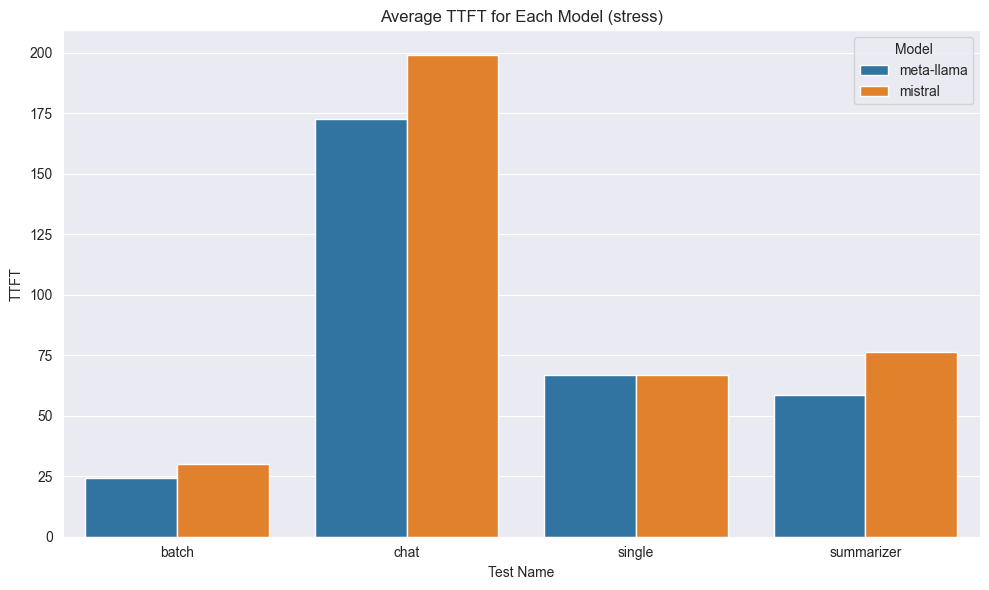

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
single_type = 'stress'
filtered = summary[summary['test_type'] == single_type]



plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='test_name', y='ttft', hue='model')
plt.title(f'Average TTFT for Each Model ({single_type})')
plt.ylabel('TTFT')
plt.xlabel('Test Name')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

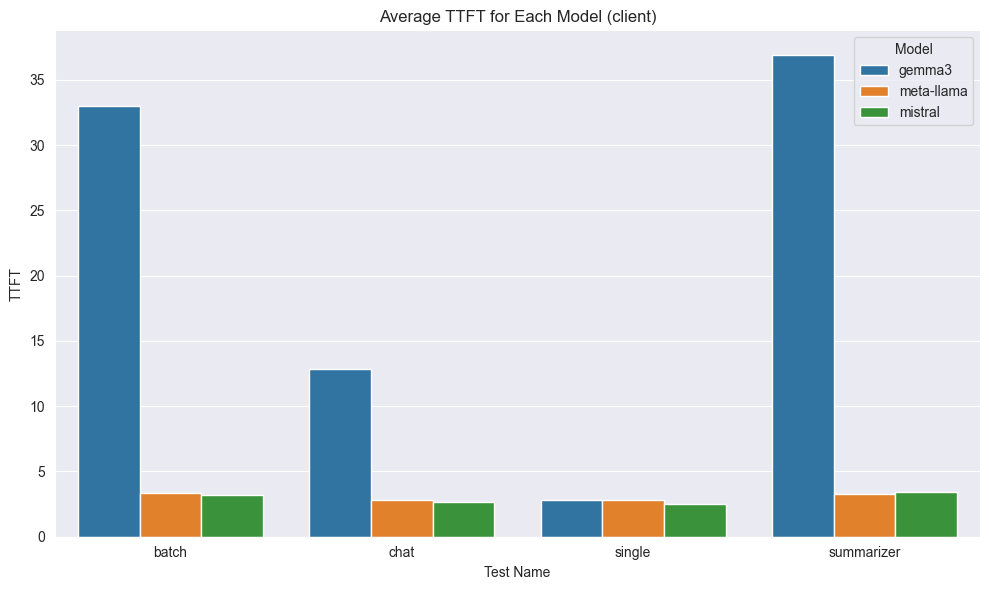

In [10]:
single_type = 'client'
filtered = summary[summary['test_type'] == single_type]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x='test_name', y='latency', hue='model')
plt.title(f'Average TTFT for Each Model ({single_type})')
plt.ylabel('TTFT')
plt.xlabel('Test Name')
plt.legend(title='Model')

plt.tight_layout()
plt.show()





In [11]:
grouped = df.groupby(['model', 'test_name', 'test_type'])['ttft'].agg(['mean', 'std']).reset_index()

import plotly.express as px

fig = px.bar(
    grouped[grouped['test_type'] == 'client'],
    x='test_name', y='mean', color='model',
    error_y='std', barmode='group',
    title='TTFT with Error Bars (Interactive)'
)
fig.show()

,model,test_name,ttft_ratio,tpot_ratio,tokens_per_sec_ratio,latency_ratio
0,meta-llama,batch,7.14,7.38,0.14,7.13
1,meta-llama,chat,61.80,17.94,0.08,61.67
2,meta-llama,single,24.16,24.00,0.06,24.09
3,meta-llama,summarizer,17.87,17.44,0.08,17.85
4,mistral,batch,9.45,10.05,0.11,9.43
5,mistral,chat,75.96,23.41,0.06,75.75
6,mistral,single,26.60,28.13,0.05,26.52
7,mistral,summarizer,22.36,22.57,0.05,22.33


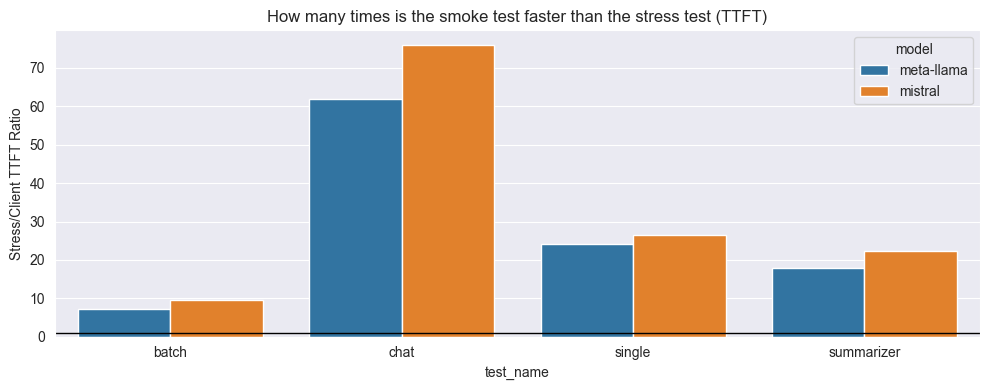

In [20]:
import numpy as np

# Remove 'gemma3' and aggregate
summary = df[~df['model'].str.contains('gemma3')].groupby(['model', 'test_name', 'test_type']).agg({
    'ttft': 'mean',
    'tpot': 'mean',
    'tokens_per_sec': 'mean',
    'latency': 'mean'
}).reset_index()

# Pivot with all expected test_type columns
pivot = summary.pivot(index=['model', 'test_name'], columns='test_type', values=['ttft', 'tpot', 'tokens_per_sec', 'latency'])
for metric in ['ttft', 'tpot', 'tokens_per_sec', 'latency']:
    for ttype in ['client', 'stress']:
        if ttype not in pivot[metric].columns:
            pivot[metric][ttype] = np.nan
pivot.columns = [f'{metric}_{ttype}' for metric, ttype in pivot.columns]
pivot = pivot.reset_index()

metrics = ['ttft', 'tpot', 'tokens_per_sec', 'latency']
results = pivot[['model', 'test_name']].copy()

for metric in metrics:
    client = pivot[f'{metric}_client'].replace(0, 1e-6)
    stress = pivot[f'{metric}_stress']
    # Ratio: how many times is stress slower than client (i.e., client is faster)
    ratio = stress / client
    results[f'{metric}_ratio'] = ratio.round(2)

from IPython.display import display
display(results)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.barplot(data=results, x='test_name', y='ttft_ratio', hue='model')
plt.ylabel('Stress/Client TTFT Ratio')
plt.title('How many times is the smoke test faster than the stress test (TTFT)')
plt.axhline(1, color='black', linewidth=1)
plt.tight_layout()
plt.show()


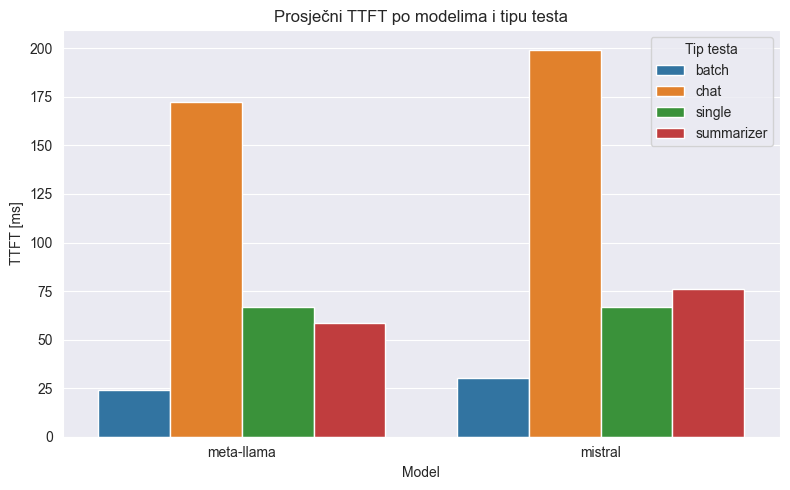

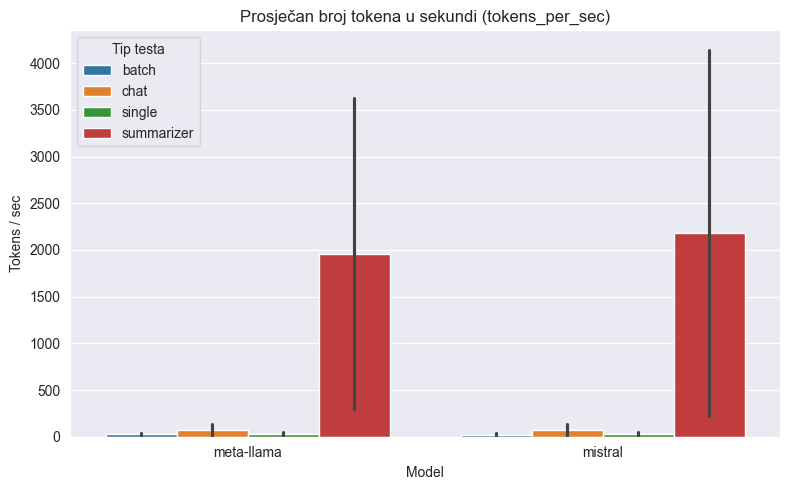

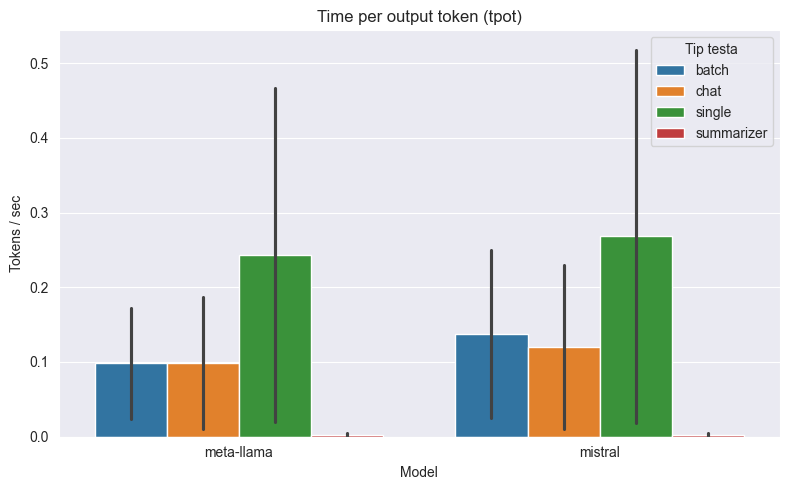

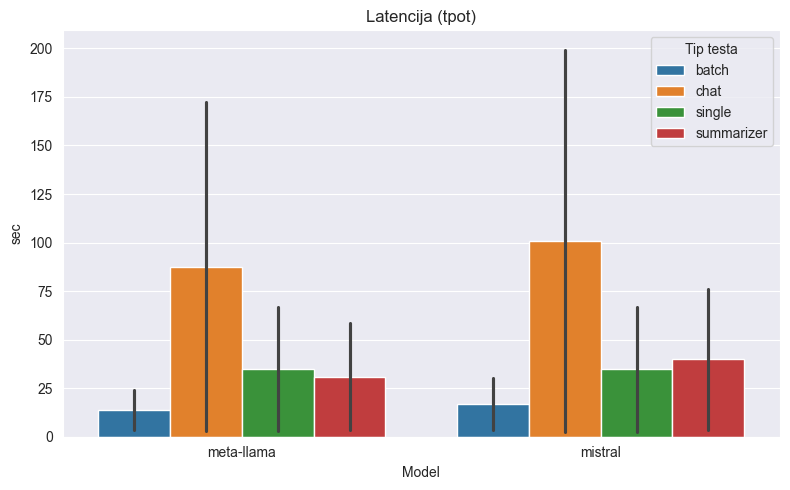

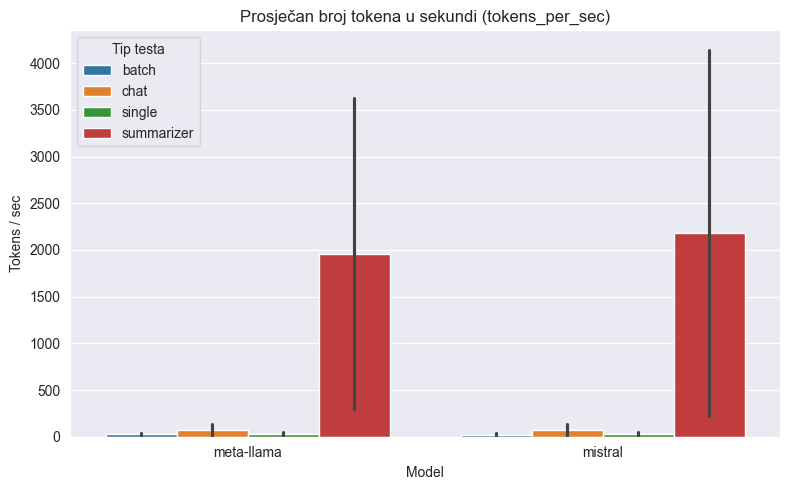

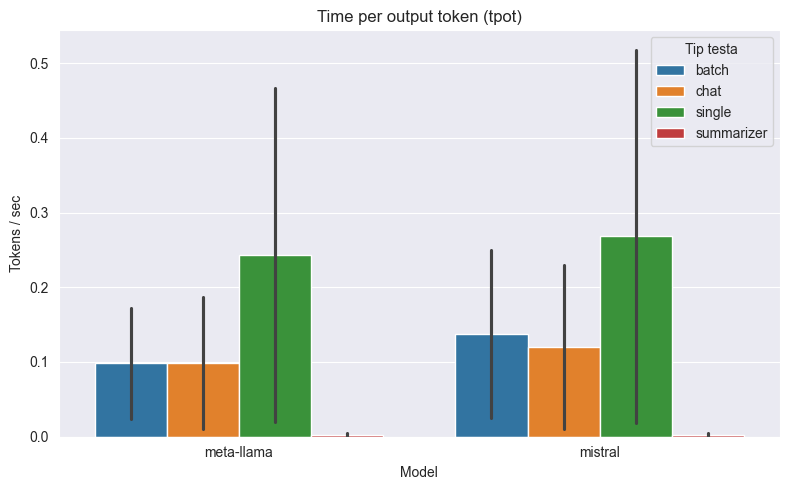

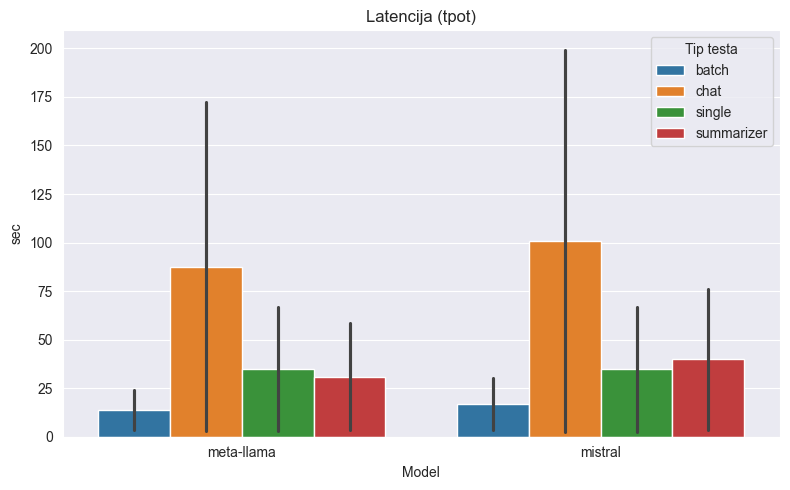

In [13]:
# TIP TESTA
# Vizualizacija: TTFT po modelima za oba tipa testiranja
plt.figure(figsize=(8,5))
sns.barplot(data=stress_summary, x='model', y='ttft', hue='test_name')
plt.title('Prosječni TTFT po modelima i tipu testa')
plt.ylabel('TTFT [ms]')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tokens_per_sec po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tokens_per_sec', hue='test_name')
plt.title('Prosječan broj tokena u sekundi (tokens_per_sec)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tpot', hue='test_name')
plt.title('Time per output token (tpot)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='latency', hue='test_name')
plt.title('Latencija (tpot)')
plt.ylabel('sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tokens_per_sec po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tokens_per_sec', hue='test_name')
plt.title('Prosječan broj tokena u sekundi (tokens_per_sec)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='tpot', hue='test_name')
plt.title('Time per output token (tpot)')
plt.ylabel('Tokens / sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()

# Vizualizacija: tpot po modelima i tipu testa
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='model', y='latency', hue='test_name')
plt.title('Latencija (tpot)')
plt.ylabel('sec')
plt.xlabel('Model')
plt.legend(title='Tip testa')
plt.tight_layout()
plt.show()